In [87]:
# you need to run
# python run_trained_agents.py --has_cuda=0 --safe_max_rho 1.0 --limit_cs_margin 60. --expe_name figure_6_all --nb_process 4 --training_iter 1 100 1000 10000 100000 300000 500000 700000 1000000 --path_agents /home/donnotben/Documents/2022_ADPRL_paper/PPO_one_week_trained
# before this notebook


# OR

# python run_trained_agents.py --has_cuda=0 --safe_max_rho 1.0 --limit_cs_margin 60. --expe_name figure_6_4 --nb_process 4 --training_iter 1000000 2000000 4000000 6000000 8000000 10000000 --path_agents /home/donnotben/Documents/2022_ADPRL_paper/PPO_one_week_trained

import matplotlib.pyplot as plt
import json
import os
import numpy as np

path = "."
score_reco = 5.44
percentile_ = [20, 40, 50, 60, 80]
# with open (os.path.join(path, "agents_runs_figure_6_2.json"), "r") as f:
with open (os.path.join(path, "agents_runs_figure_6_3.json"), "r") as f:
    dict_all_ = json.load(f)

In [88]:
score_iter = {}
nb_survived_iter = {}
for safe_max_rho_, dict_f in dict_all_.items():
    for limit_cs_margin_, res_margin in dict_f.items(): 
        for training_iter_, res_iter in res_margin.items():
            score_this = []
            nb_survived_this = []
            for weights_dir_str, tmp_res_model in res_iter.items():
                model_nm = os.path.split(os.path.split(weights_dir_str)[0])[1]
                score_this.append(tmp_res_model['score_avg'])
                nb_survived_this.append(tmp_res_model["total_survived"])
            if score_this:
                score_iter[training_iter_] = (np.percentile(score_this, percentile_[0]),
                                              np.percentile(score_this, percentile_[1]),
                                              np.percentile(score_this, percentile_[2]),
                                              np.percentile(score_this, percentile_[3]),
                                              np.percentile(score_this, percentile_[4]),
                                              )
            if nb_survived_this:
                nb_survived_iter[training_iter_] = (np.percentile(nb_survived_this, percentile_[0]),
                                                    np.percentile(nb_survived_this, percentile_[1]),
                                                    np.percentile(nb_survived_this, percentile_[2]),
                                                    np.percentile(nb_survived_this, percentile_[3]),
                                                    np.percentile(nb_survived_this, percentile_[4]),
                                                    )


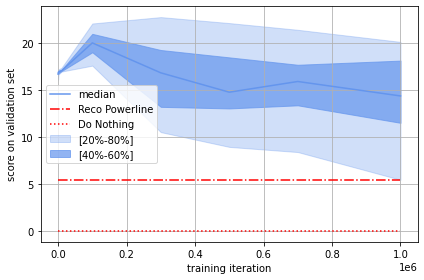

In [89]:
x_plt = sorted(score_iter.keys(),
               key=lambda x: int(x))
x_displ = [int(el) for el in x_plt]
plt.fill_between(x_displ,
                 y1=[score_iter[el][0] for el in x_plt],
                 y2=[score_iter[el][4] for el in x_plt],
                 color="cornflowerblue",
                 alpha=0.3,
                 label=f"[{percentile_[0]}%-{percentile_[-1]}%]"
                 )
plt.fill_between(x_displ,
                 y1=[score_iter[el][1] for el in x_plt],
                 y2=[score_iter[el][3] for el in x_plt],
                 color="cornflowerblue",
                 alpha=0.7,
                 label=f"[{percentile_[1]}%-{percentile_[-2]}%]"
                 )
plt.plot(x_displ,
         [score_iter[el][2] for el in x_plt], 
         color="cornflowerblue",
         label="median")
if True:
    plt.plot((x_displ[0], x_displ[-1]),
             [score_reco, score_reco],
             color="red",
             linestyle="-.",
             label="Reco Powerline")
    plt.plot((x_displ[0], x_displ[-1]),
             [0., 0.],
             color="red",
             linestyle=":",
             label="Do Nothing")
plt.xlabel("training iteration")
plt.ylabel("score on validation set")
plt.grid()
plt.legend() # loc="upper left")
plt.tight_layout()